# Static FC analyses Stroke & Elderly

In [1]:
import sys

sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/StaticFC/')
sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/Clinical/')
from static_fc_feat import StaticFC
from clinical_analyses import ClinicalAnalyses

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/kinany/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/kinany/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 0. Load configuration & patient data

In [2]:
with open('../config/sFC_config_age_stroke_young.json') as config_file:
    config = json.load(config_file)

In [14]:
patients = ClinicalAnalyses(config)

Creating instance for config age_stroke_feat_C5toC7
overwrite_clinical: True


In [15]:
clinical_info = patients.get_patient_info()

Extracting clinical data...
Done!


/home/kinany/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


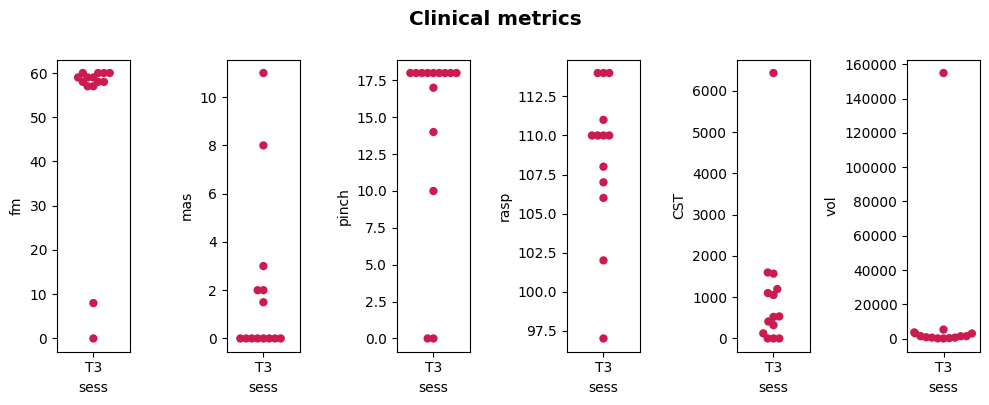

In [29]:
patients.plot_info(clinical_info,['fm','mas','pinch','rasp','CST','vol'])

## 1. Prepare FC data

#### 1a. Create instance of StaticFC class for further analyses

In [3]:
sFC = StaticFC(config) 

Creating instance for config age_stroke_feat_C5toC7
overwrite_flipping: False
overwrite_smoothing: False
overwrite_tc: False
overwrite_corr: False
overwrite_alff_maps: False
overwrite_alff_rois: True


#### 1b. Prepare data
*_Denoise (filter or not) > Normalize to PAM50 > Flip if neeeded > Smooth_*

In [14]:
sFC.prepare_data()

PREPARE DATA
... Flip normalized denoised images
Overwrite old files: False
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   10.6s remaining:   15.9s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:   10.6s remaining:    7.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   10.6s finished
... Operation performed in 10.763 s
... Smooth normalized denoised images
Overwrite old files: False
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:  7.1min
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:  7.3min
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  7.4min
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:  7.6min
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:  7.7m

####  1c. Load timecourses

In [4]:
tcs = sFC.extract_tcs()

Timecourses extraction
Overwrite old files: False
Timecourses already extracted, loading from .pkl fike...


In [45]:
tcs

,t,tc,sub,sess,roi,group
0,0,101.573003,SUVA-TIMES-002,T3,frost_C5toC7_gm_VL,P
1,1,6.229511,SUVA-TIMES-002,T3,frost_C5toC7_gm_VL,P
2,2,-187.569384,SUVA-TIMES-002,T3,frost_C5toC7_gm_VL,P
3,3,208.605687,SUVA-TIMES-002,T3,frost_C5toC7_gm_VL,P
4,4,86.942290,SUVA-TIMES-002,T3,frost_C5toC7_gm_VL,P
...,...,...,...,...,...,...
31675,235,-743.159849,RS_AS,,frost_C5toC7_gm_DR,H
31676,236,245.647260,RS_AS,,frost_C5toC7_gm_DR,H
31677,237,-140.713760,RS_AS,,frost_C5toC7_gm_DR,H
31678,238,9.829079,RS_AS,,frost_C5toC7_gm_DR,H


### 2. Correlations analyses

#### 2a. Computations

ROI-TO-ROI CORRELATION
Overwrite old files: False
Correlations already computed, loading from .pkl fike...


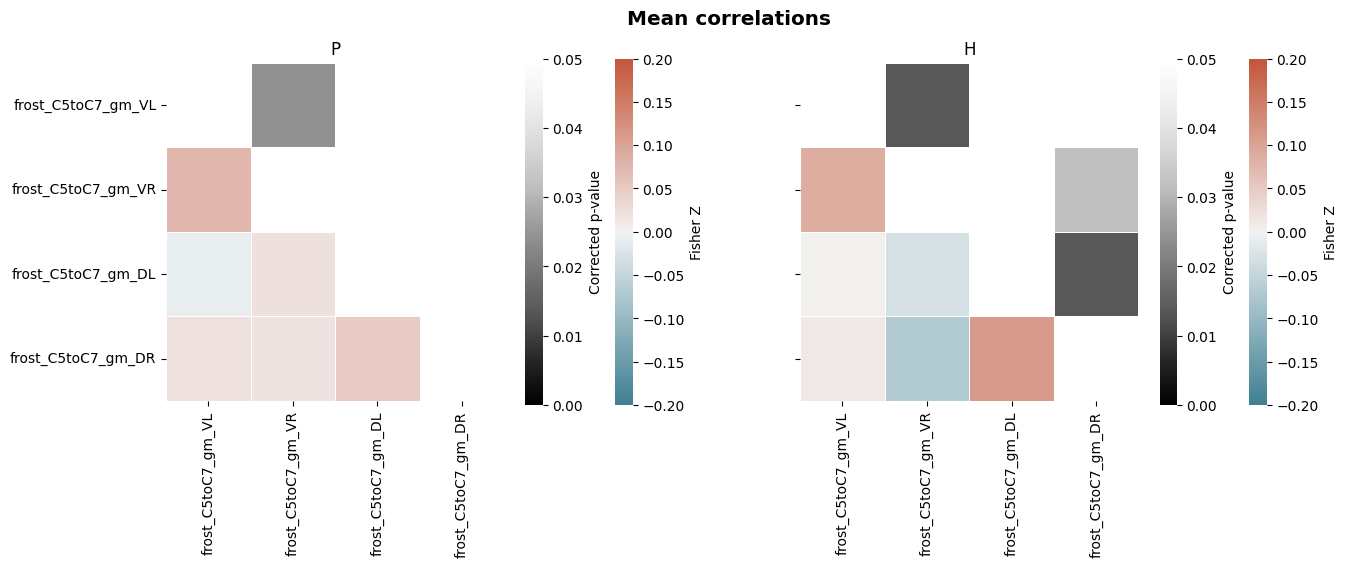

In [10]:
corrs_df,corrs_stats_df = sFC.compute_correlations(tcs=tcs)

COMPARE FC PATTERNS BETWEEN GROUPS
Group 1: H
Group 2: P


(                  roi1                roi2         p
 0   frost_C5toC7_gm_VL  frost_C5toC7_gm_VL  0.046385
 1   frost_C5toC7_gm_VL  frost_C5toC7_gm_VR  0.433535
 2   frost_C5toC7_gm_VL  frost_C5toC7_gm_DL  0.316483
 3   frost_C5toC7_gm_VL  frost_C5toC7_gm_DR  0.648876
 4   frost_C5toC7_gm_VR  frost_C5toC7_gm_VL  0.433535
 5   frost_C5toC7_gm_VR  frost_C5toC7_gm_VR  0.241646
 6   frost_C5toC7_gm_VR  frost_C5toC7_gm_DL  0.018800
 7   frost_C5toC7_gm_VR  frost_C5toC7_gm_DR  0.006653
 8   frost_C5toC7_gm_DL  frost_C5toC7_gm_VL  0.316483
 9   frost_C5toC7_gm_DL  frost_C5toC7_gm_VR  0.018800
 10  frost_C5toC7_gm_DL  frost_C5toC7_gm_DL  0.788822
 11  frost_C5toC7_gm_DL  frost_C5toC7_gm_DR  0.372160
 12  frost_C5toC7_gm_DR  frost_C5toC7_gm_VL  0.648876
 13  frost_C5toC7_gm_DR  frost_C5toC7_gm_VR  0.006653
 14  frost_C5toC7_gm_DR  frost_C5toC7_gm_DL  0.372160
 15  frost_C5toC7_gm_DR  frost_C5toC7_gm_DR  0.702057,
 array([[  nan,  0.01,  0.01, -0.01],
        [ 0.01,   nan, -0.06, -0.09],
     

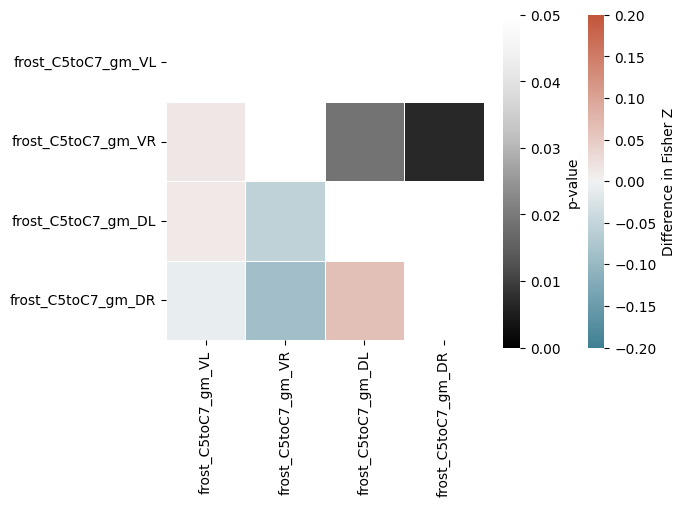

In [11]:
sFC.compare_correlations(corrs_df, ['H','P'], paired=False)

#### 2b. Link with functional connectivity
_Note: for the next steps, select corrs_totest(_names) based on config & chosen analyses_

#### Option 1: Interhemispheric FC

_**If using whole cord**_

In [12]:
vv = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_VR') & (corrs_df['roi2']=='frost_C5toC7_gm_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_DR') & (corrs_df['roi2']=='frost_C5toC7_gm_DL')]['rho_Z'].values]
vd = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_VR') & (corrs_df['roi2']=='frost_C5toC7_gm_DR')]['rho_Z'].values]
# For all
#corrs_totest = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))
#corrs_totest_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR']

# Just for DD VV
corrs_totest = np.transpose(np.concatenate((vv,dd,vd),axis=0))
corrs_totest_names = ['V-V','D-D','V-D']

In [65]:
vv = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_VR') & (corrs_df['roi2']=='frost_C5toC7_gm_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_DR') & (corrs_df['roi2']=='frost_C5toC7_gm_DL')]['rho_Z'].values]
vd = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C5toC7_gm_VR') & (corrs_df['roi2']=='frost_C5toC7_gm_DR')]['rho_Z'].values]
# For all
#corrs_totest = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))
#corrs_totest_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR']

# Just for DD VV
corrs_totest = np.transpose(np.concatenate((vv,dd,vd),axis=0))
corrs_totest_names = ['V-V','D-D','V-D']

In [48]:
lr = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='frost_C7_VL') & (corrs_df['roi2']=='frost_C7_VR')]['rho_Z'].values]

corrs_totest = np.transpose(np.concatenate((lr,lr),axis=0))
corrs_totest_names = ['LR','LR']

_**If using all individual spinal levels**_

In [ ]:
c5_vv = [corrs_df[(corrs_df['roi1']=='C5_VR') & (corrs_df['roi2']=='C5_VL')]['rho_Z'].values]
c5_dd = [corrs_df[(corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_DL')]['rho_Z'].values]
c6_vv = [corrs_df[(corrs_df['roi1']=='C6_VR') & (corrs_df['roi2']=='C6_VL')]['rho_Z'].values]
c6_dd = [corrs_df[(corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_DL')]['rho_Z'].values]
c7_vv = [corrs_df[(corrs_df['roi1']=='C7_VR') & (corrs_df['roi2']=='C7_VL')]['rho_Z'].values]
c7_dd = [corrs_df[(corrs_df['roi1']=='C7_DR') & (corrs_df['roi2']=='C7_DL')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((c5_vv,c5_dd,c6_vv,c6_dd,c7_vv,c7_dd),axis=0))
corrs_totest_names = ['C5 V-V','C5 D-D','C6 V-V','C6 D-D','C7 V-V','C7 D-D']

#### Option 2: Significant FC

_Note: there were 3 significant correlations: **(1)** C5DR-C5VR, **(2)** C6DL-C6DR, **(3)** C6DR-C6VR_

In [94]:
C5DR_C5VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_VR')]['rho_Z'].values]
C6DL_C6DR  = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DL') & (corrs_df['roi2']=='C6_DR')]['rho_Z'].values]
C6DR_C6VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_VR')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((C5DR_C5VR,C6DL_C6DR,C6DR_C6VR),axis=0))
corrs_totest_names = ['C5DR-C5VR','C6DL-C6DR','C6DR-C6VR']

#### ! To run for all options

,tested,clinical,rho,p
0,V-V,fm,0.137233,0.639907
1,D-D,fm,-0.061073,0.835696
2,V-D,fm,-0.190490,0.514200
3,V-V,mas,-0.199225,0.494716
4,D-D,mas,0.134644,0.646292
5,V-D,mas,0.173208,0.553739
6,V-V,pinch,0.063138,0.830213
7,D-D,pinch,0.164873,0.573258
8,V-D,pinch,-0.262063,0.365416
9,V-V,rasp,-0.305633,0.309863


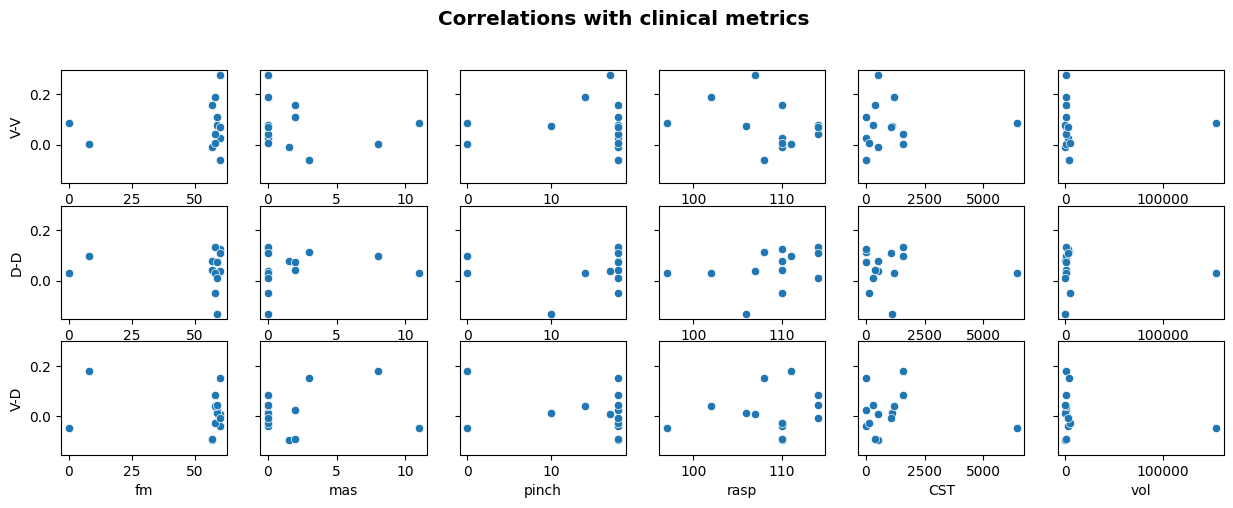

In [16]:
patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','rasp','CST','vol'],rm_confounds=False,totest_values=corrs_totest,totest_names=corrs_totest_names)

In [160]:
frames_df = pd.read_csv('/media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/iCAPs_results/PAM50_C5toC7_14P_Alpha_5_95_Fraction_0DOT05/K_30_Dist_cosine_Folds_20/Frames.csv',header=None, names=['iCAP1','iCAP2','iCAP3','iCAP4','iCAP5','iCAP6','iCAP7','iCAP8','iCAP9','iCAP10','iCAP11','iCAP12','iCAP13','iCAP14','iCAP15','iCAP16','iCAP17','iCAP18','iCAP19','iCAP20','iCAP21','iCAP22','iCAP23','iCAP24','iCAP25','iCAP26','iCAP27','iCAP28','iCAP29','iCAP30'])

In [168]:
frames = np.loadtxt('/media/miplab-nas2/Data3/SpinalCord/4_Age_Stroke/iCAPs_results/PAM50_C5toC7_14P_Alpha_5_95_Fraction_0DOT05/K_30_Dist_cosine_Folds_20/Frames.csv',delimiter=",")

In [185]:
frames[:,[3,6,16,21]]

array([[14., 11., 13., 10.],
       [17., 21., 16., 14.],
       [10., 11., 11.,  5.],
       [18., 19., 18., 10.],
       [27., 17.,  9.,  9.],
       [ 9., 14., 16.,  6.],
       [29., 22., 13.,  8.],
       [23., 13., 12., 10.],
       [17., 17., 12., 14.],
       [20., 11., 11.,  6.],
       [16., 24., 14., 19.],
       [15., 20., 13.,  6.],
       [18., 13.,  6., 18.],
       [11.,  8., 14., 15.]])

In [180]:
t=clinical_correlations['p']<0.01
[i for i, x in enumerate(t) if x]

[130]

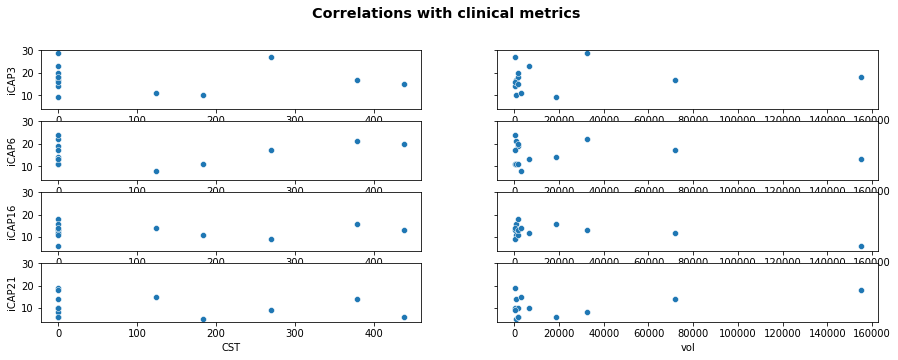

In [188]:
clinical_correlations=patients.compute_correlations(clinical_data=clinical_info,clinical_names=['CST','vol'],totest_values=frames[:,[3,6,16,21]],totest_names=['iCAP3','iCAP6','iCAP16','iCAP21'])

In [189]:
clinical_correlations

,tested,clinical,rho,p
0,iCAP3,CST,-0.295225,0.351547
1,iCAP6,CST,0.332495,0.290981
2,iCAP16,CST,0.594227,0.041598
3,iCAP21,CST,-0.205937,0.520788
4,iCAP3,vol,0.012047,0.970358
5,iCAP6,vol,-0.116399,0.718662
6,iCAP16,vol,-0.677699,0.015448
7,iCAP21,vol,0.460771,0.131674


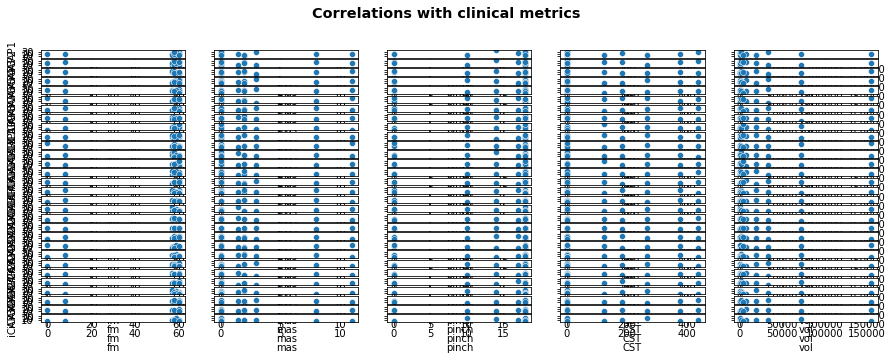

In [179]:
clinical_correlations=patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','CST','vol'],totest_values=frames,totest_names=['iCAP1','iCAP2','iCAP3','iCAP4','iCAP5','iCAP6','iCAP7','iCAP8','iCAP9','iCAP10','iCAP11','iCAP12','iCAP13','iCAP14','iCAP15','iCAP16','iCAP17','iCAP18','iCAP19','iCAP20','iCAP21','iCAP22','iCAP23','iCAP24','iCAP25','iCAP26','iCAP27','iCAP28','iCAP29','iCAP30'])

#### Test with classification

In [86]:
# Extract corr for controls (already done above for patients)
vv = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_DR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]
dv_r = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DR')]['rho_Z'].values]    
dv_l = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VL') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]   
vr_dl = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VR') & (corrs_df['roi2']=='mask_midC5toC7_gm_DL')]['rho_Z'].values]    
vl_dr = [corrs_df[(corrs_df['sess']=='') & (corrs_df['roi1']=='mask_midC5toC7_gm_VL') & (corrs_df['roi2']=='mask_midC5toC7_gm_DR')]['rho_Z'].values]    
corrs_totest_H = np.transpose(np.concatenate((vv,dd,dv_r,dv_l,vr_dl,vl_dr),axis=0))


In [107]:
# Create dataframe
corrs_totest_P_withgrp = np.hstack((corrs_totest_P, 2*np.ones((corrs_totest_P.shape[0], 1))))
corrs_totest_H_withgrp = np.hstack((corrs_totest_H, np.ones((corrs_totest_H.shape[0], 1))))
data_classif = np.concatenate([corrs_totest_P_withgrp, corrs_totest_H_withgrp],axis=0)
col_names = ['V-V','D-D','D-V (R)', 'D-V (L)', 'VR-DL', 'VL-DR', 'grp']
data_classif_df = pd.DataFrame(data=data_classif, columns=col_names)

In [110]:
data_classif_df['grp'] = data_classif_df['grp'].astype('int')

In [121]:
X = data_classif_df[col_names[:-1]]
y = data_classif_df[col_names[-1]]

In [135]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X = sc.fit_transform(X) 

In [136]:
# Fitting Kernel SVM to the Training set 
from sklearn.svm import SVC 
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(X, y) 


SVC(random_state=0)

In [139]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 8) 
accuracies.mean() 
accuracies.std()

0.0721687836487032

#### 3. ALFF analyses

In [131]:
sFC.compute_alff_maps()

ALFF MAPS COMPUTATION
Overwrite old files: False
... Running on data that do not need to be flipped
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0906s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n

In [38]:
alff

,sub,sess,group,roi,alff
0,SUVA-TIMES-002,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,1.685901
1,SUVA-TIMES-003,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,2.173775
2,SUVA-TIMES-006,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,1.558113
3,SUVA-TIMES-007,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,1.811278
4,SUVA-TIMES-008,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,2.142709
5,SUVA-TIMES-010,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,1.482583
6,SUVA-TIMES-014,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,2.515245
7,SUVA-TIMES-021,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,1.617146
8,SUVA-TIMES-022,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,1.762697
9,SUVA-TIMES-023,T3,P,randomise_noconfounds_tfce_corrp_tstat2_mask,1.874495


ALFF IN ROIS
Overwrite old files: True
Extracting ALFF for subject SUVA-TIMES-002
...Session T3
231129-16:27:06,387 nipype.interface INFO:
	 stdout 2023-11-29T16:27:06.386959:1.640321 
231129-16:27:06,934 nipype.interface INFO:
	 stdout 2023-11-29T16:27:06.934473:1.564286 
231129-16:27:07,438 nipype.interface INFO:
	 stdout 2023-11-29T16:27:07.438053:1.471701 
231129-16:27:07,954 nipype.interface INFO:
	 stdout 2023-11-29T16:27:07.954178:1.518251 
Extracting ALFF for subject SUVA-TIMES-003
...Session T3
231129-16:27:08,507 nipype.interface INFO:
	 stdout 2023-11-29T16:27:08.507326:1.783680 
231129-16:27:09,39 nipype.interface INFO:
	 stdout 2023-11-29T16:27:09.039460:1.774085 
231129-16:27:09,540 nipype.interface INFO:
	 stdout 2023-11-29T16:27:09.540480:1.970929 
231129-16:27:10,47 nipype.interface INFO:
	 stdout 2023-11-29T16:27:10.047503:1.910618 
Extracting ALFF for subject SUVA-TIMES-006
...Session T3
231129-16:27:10,542 nipype.interface INFO:
	 stdout 2023-11-29T16:27:10.542694:1

Extracting ALFF for subject RS_MD
...Session 
231129-16:27:48,154 nipype.interface INFO:
	 stdout 2023-11-29T16:27:48.153992:1.552894 
231129-16:27:48,664 nipype.interface INFO:
	 stdout 2023-11-29T16:27:48.663932:1.496671 
231129-16:27:49,212 nipype.interface INFO:
	 stdout 2023-11-29T16:27:49.211878:1.611821 
231129-16:27:49,750 nipype.interface INFO:
	 stdout 2023-11-29T16:27:49.750617:1.541225 
Extracting ALFF for subject RS_MP
...Session 
231129-16:27:50,286 nipype.interface INFO:
	 stdout 2023-11-29T16:27:50.285889:1.891261 
231129-16:27:50,819 nipype.interface INFO:
	 stdout 2023-11-29T16:27:50.819583:1.748559 
231129-16:27:51,334 nipype.interface INFO:
	 stdout 2023-11-29T16:27:51.334416:1.665341 
231129-16:27:51,838 nipype.interface INFO:
	 stdout 2023-11-29T16:27:51.838047:1.778957 
Extracting ALFF for subject RS_NG
...Session 
231129-16:27:52,346 nipype.interface INFO:
	 stdout 2023-11-29T16:27:52.346373:1.563191 
231129-16:27:52,910 nipype.interface INFO:
	 stdout 2023-11-2

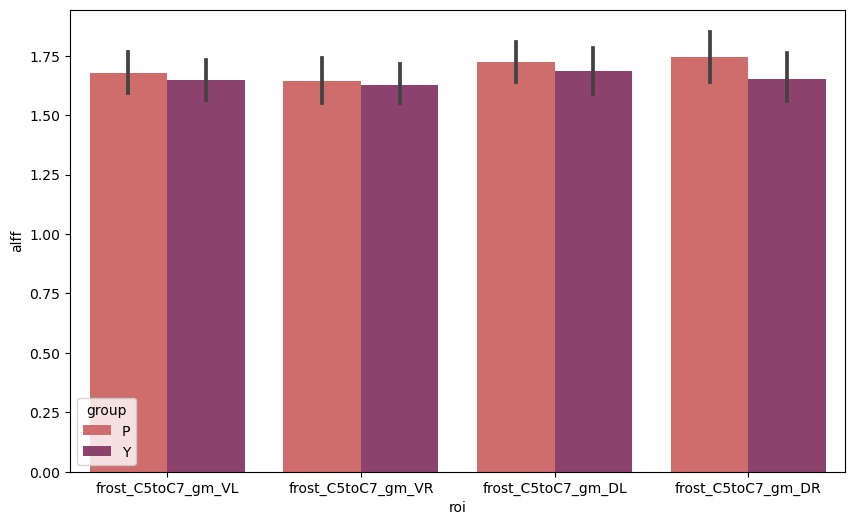

In [67]:
alff = sFC.compute_alff_rois()

In [17]:
alff_totest = alff[alff['group']=='P']['alff'].values
alff_totest = alff_totest.reshape([14,1])
alff_totest_names=['alff','alff']
alff_totest = np.concatenate((alff_totest, alff_totest),axis=1)

,tested,clinical,rho,p
0,alff,fm,0.039346,0.893764
1,alff,fm,0.039346,0.893764
2,alff,mas,-0.012948,0.964958
3,alff,mas,-0.012948,0.964958
4,alff,pinch,-0.065684,0.823463
5,alff,pinch,-0.065684,0.823463
6,alff,CST,-0.195724,0.502483
7,alff,CST,-0.195724,0.502483
8,alff,vol,-0.267097,0.355936
9,alff,vol,-0.267097,0.355936


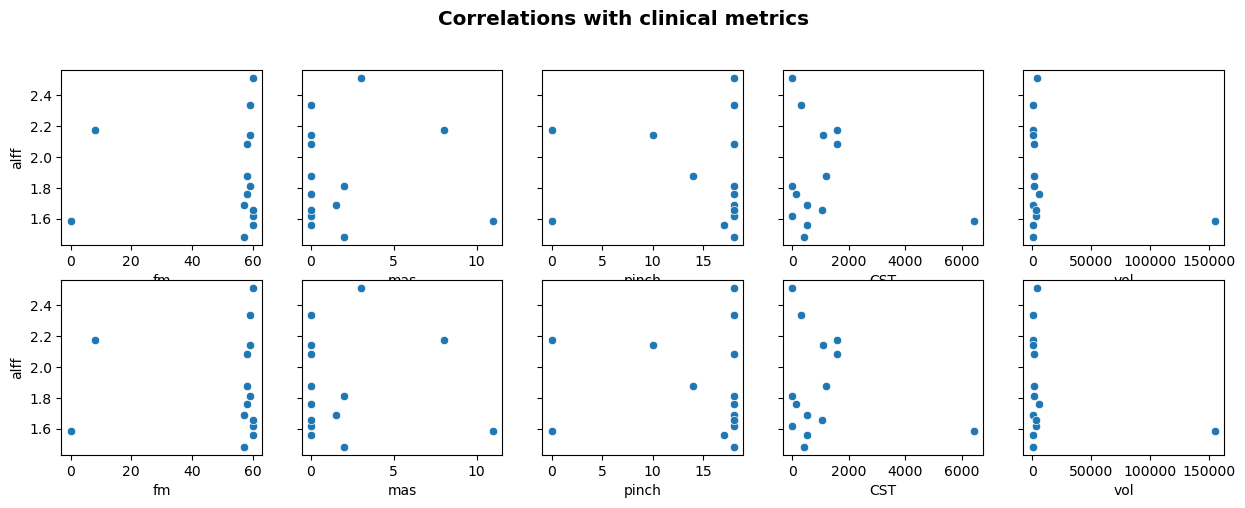

In [46]:
patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','CST','vol'],rm_confounds=False,totest_values=alff_totest,totest_names=alff_totest_names)


In [47]:
alff_totest

array([[1.69, 1.69],
       [2.17, 2.17],
       [1.56, 1.56],
       [1.81, 1.81],
       [2.14, 2.14],
       [1.48, 1.48],
       [2.52, 2.52],
       [1.62, 1.62],
       [1.76, 1.76],
       [1.87, 1.87],
       [2.34, 2.34],
       [2.09, 2.09],
       [1.58, 1.58],
       [1.66, 1.66]])

In [172]:
corrs_totest.shape

(14, 3)